In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ticker = ["AAPL"]
start_date="2020-01-01"
end_date="2023-12-31"
data=yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02 00:00:00+00:00,72.796028,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03 00:00:00+00:00,72.088280,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06 00:00:00+00:00,72.662720,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07 00:00:00+00:00,72.320969,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08 00:00:00+00:00,73.484352,75.797501,76.110001,74.290001,74.290001,132079200


## Moving averate strategy

In [12]:
data["SMA_9"] = data["Adj Close"].iloc[:,0].rolling(window = 9).mean()
data["SMA_21"] = data["Adj Close"].iloc[:,0].rolling(window= 21).mean()
data["Signal"] = 0
data.loc[data["SMA_9"] > data["SMA_21"], "Signal"] = 1
data.loc[data["SMA_9"] < data["SMA_21"], "Signal"] =-1

In [14]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume,SMA_9,SMA_21,Signal
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,,
2023-12-22 00:00:00+00:00,192.656174,193.600006,195.410004,192.970001,195.179993,37122800,195.076543,192.549078,1
2023-12-26 00:00:00+00:00,192.108871,193.050003,193.889999,192.830002,193.610001,28919300,194.892997,192.695031,1
2023-12-27 00:00:00+00:00,192.208359,193.149994,193.500000,191.089996,192.490005,48087700,194.361157,192.854251,1
2023-12-28 00:00:00+00:00,192.636276,193.580002,194.660004,193.169998,194.139999,34049900,193.860277,193.004942,1
2023-12-29 00:00:00+00:00,191.591385,192.529999,194.399994,191.729996,193.899994,42628800,193.303006,193.154685,1


## Visualize the strategy

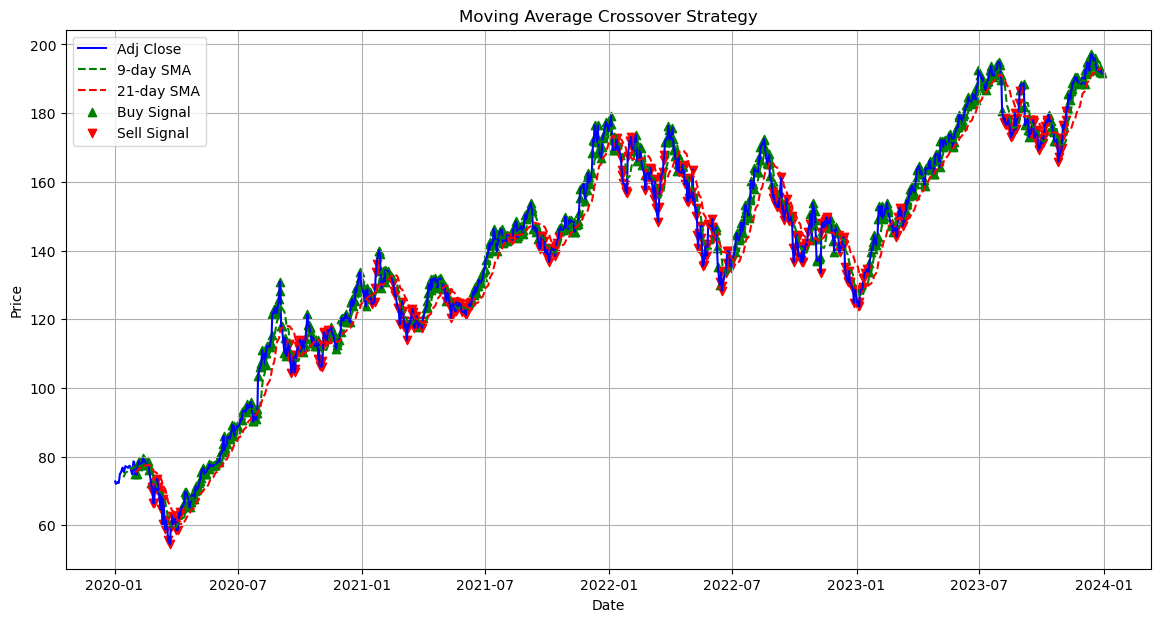

In [16]:
plt.figure(figsize=(14,7))
plt.plot(data.index, data["Adj Close"].iloc[:,0], label = "Adj Close", color = "blue")
plt.plot(data.index, data["SMA_9"], label = "9-day SMA", color = "green", linestyle = "--")
plt.plot(data.index, data["SMA_21"], label = "21-day SMA", color = "red", linestyle = "--")

buy_signals = data[data["Signal"] == 1]
sell_signals = data[data["Signal"] == -1]

plt.scatter(buy_signals.index, buy_signals["Adj Close"].iloc[:,0], marker = "^", color="green", label="Buy Signal", alpha=1)
plt.scatter(sell_signals.index, sell_signals["Adj Close"].iloc[:,0], marker = "v", color="red", label="Sell Signal", alpha=1)

plt.title("Moving Average Crossover Strategy")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

## Backtesting - cummulative return

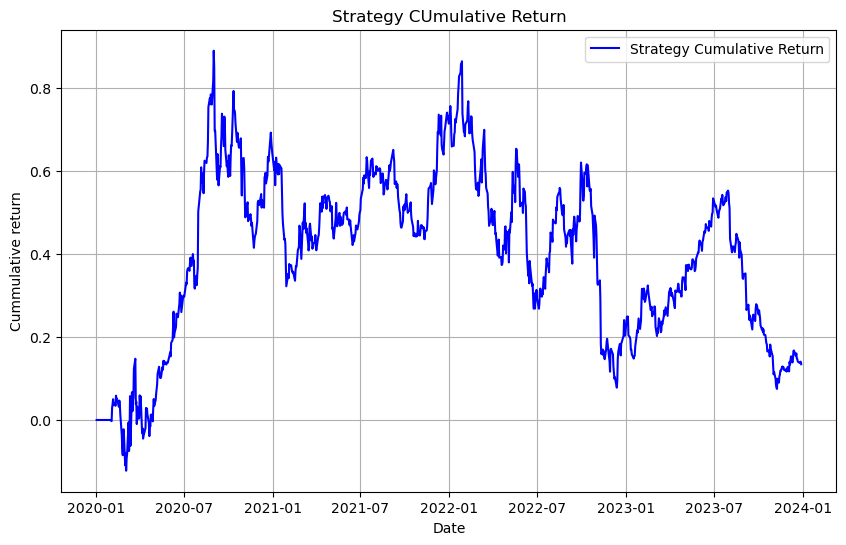

In [21]:

data["Daily_Return"]=np.log(data["Adj Close"].iloc[:,0]/data["Adj Close"].iloc[:,0].shift(1))

data["Strategy_Return"]=data["Daily_Return"]*data["Signal"].shift(1)

data["Cummulative_Return"]=(1+data["Strategy_Return"]).cumprod() - 1

plt.figure(figsize=(10,6))
plt.plot(data.index, data["Cummulative_Return"], label="Strategy Cumulative Return", color="blue")
plt.title("Strategy CUmulative Return")
plt.xlabel("Date")
plt.ylabel("Cummulative return")
plt.legend()
plt.grid()
plt.show()


## Metric to evaluate strategy performance

In [171]:
# calculate annulized return
trading_days = 252
annualized_return = data["Strategy_Return"].mean() * trading_days
print(f"Annualized Return: {annualized_return: .2f}")

# calculate annulized volatility
annualized_vol = data["Strategy_Return"].std() * np.sqrt(trading_days)
print(f"Annualized volatility: {annualized_vol: .2f}")

# calculate Sharpe Ratio
Sharpe_Ratio = annualized_return / annualized_vol
print(f"Sharpe ratio: {Sharpe_Ratio: .2f}")

# calculate maximum drawndown
data["cummulative_return_max"] = data["Cummulative_Return"].cummax()
drawdown = (data["Cummulative_Return"] - data["cummulative_return_max"])/data["cummulative_return_max"]
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown: .2%}")

Annualized Return:  0.09
Annualized volatility:  0.33
Sharpe ratio:  0.26
Maximum Drawdown: -43.15%
